# $Model$

## Using the titanic data:



### imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import acquire
import prepare

np.random.seed(9)

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

### Acquire

In [3]:
titanic_df =acquire.new_titanic_data()

### Prepare

In [4]:
titanic_df=prepare.prep_titanic(titanic_df)

In [5]:
titanic_df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [6]:
titanic_processing_df = titanic_df.drop(columns={'sex','class', 'embark_town'})

In [7]:
titanic_processing_df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,1


In [8]:
titanic_processing_df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [9]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = titanic_processing_df[['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton']]

y = titanic_processing_df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [10]:
X_train.shape, X_validate.shape,X_test.shape

((498, 10), (125, 10), (268, 10))

In [11]:
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)


In [12]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
456,65.000000,0,0,26.5500,1,1,0,0,0,1
8,27.000000,0,2,11.1333,0,0,0,1,0,1
19,30.370693,0,0,7.2250,1,0,0,1,0,0
95,30.370693,0,0,8.0500,1,1,0,1,0,1
86,16.000000,1,3,34.3750,0,1,0,1,0,1


In [13]:
y_train.head()

456    0
8      1
19     1
95     0
86     0
Name: survived, dtype: int64

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [14]:
# set target variable survived baseline
baseline = y_train.mode()
baseline

0    0
Name: survived, dtype: int64

In [15]:
X_train['baseline_prediction'] = int(baseline)
X_train

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
456,65.000000,0,0,26.5500,1,1,0,0,0,1,0
8,27.000000,0,2,11.1333,0,0,0,1,0,1,0
19,30.370693,0,0,7.2250,1,0,0,1,0,0,0
95,30.370693,0,0,8.0500,1,1,0,1,0,1,0
86,16.000000,1,3,34.3750,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
430,28.000000,0,0,26.5500,1,1,0,0,0,1,0
361,29.000000,1,0,27.7208,0,1,1,0,0,0,0
519,32.000000,0,0,7.8958,1,1,0,1,0,1,0
383,35.000000,1,0,52.0000,0,0,0,0,0,1,0


In [16]:
actual = y_train
predictions = X_train.baseline_prediction

In [17]:
pd.crosstab(actual, predictions)

baseline_prediction,0
survived,
0,298
1,200


In [18]:
print('baseline accuracy :',(298)/(200+298))

baseline accuracy : 0.5983935742971888


In [19]:
X_train = X_train.drop(columns = ['baseline_prediction'])


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 456 to 438
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      498 non-null    float64
 1   sibsp                    498 non-null    int64  
 2   parch                    498 non-null    int64  
 3   fare                     498 non-null    float64
 4   alone                    498 non-null    int64  
 5   sex_male                 498 non-null    uint8  
 6   class_Second             498 non-null    uint8  
 7   class_Third              498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 25.8 KB


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [21]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5)

In [22]:
tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- age <= 56.00
|   |   |   |--- fare <= 26.12
|   |   |   |   |--- age <= 37.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  37.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  26.12
|   |   |   |   |--- class: 1
|   |   |--- age >  56.00
|   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- fare <= 24.81
|   |   |   |--- age <= 31.50
|   |   |   |   |--- age <= 6.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  6.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  31.50
|   |   |   |   |--- class: 0
|   |   |--- fare >  24.81
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- age <= 6.50
|   |   |--- sibsp <= 2.00
|   |   |   |--- class: 1
|   |   |--- sibsp >  2.00
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- fare <= 26.27
|   |   |   |--- age <= 13.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  13.50
|   |   |   |   |--- em

In [23]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

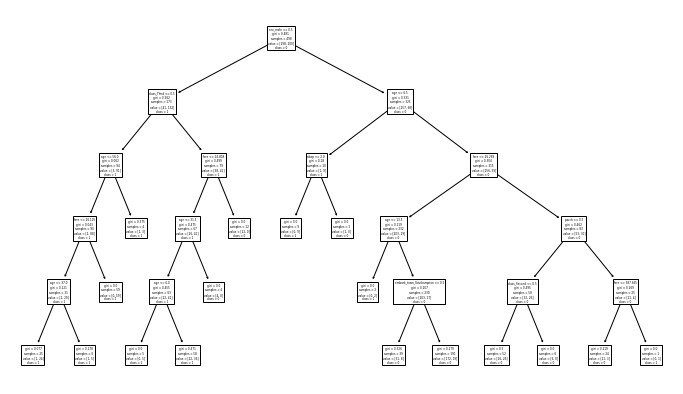

In [24]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [25]:
predictions = tree_1.predict(X_train)
actual = y_train

In [26]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,273,25
1,56,144


In [27]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       298
           1       0.85      0.72      0.78       200

    accuracy                           0.84       498
   macro avg       0.84      0.82      0.83       498
weighted avg       0.84      0.84      0.83       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [28]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP 

(273, 25, 56, 144)

In [29]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,273,25
1,56,144


In [30]:
# look at accuracy of tree_1 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       298
           1       0.85      0.72      0.78       200

    accuracy                           0.84       498
   macro avg       0.84      0.82      0.83       498
weighted avg       0.84      0.84      0.83       498



### Accuracy is 0.84 for tree_1 Model

### 5.Run through steps 2-4 using a different max_depth value.


In [31]:
# Create the decision tree object and specify hyperparams
tree_2 = DecisionTreeClassifier(max_depth = 7,min_samples_split = 13)

In [32]:
tree_2.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_2, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- age <= 56.00
|   |   |   |--- fare <= 26.12
|   |   |   |   |--- age <= 37.00
|   |   |   |   |   |--- parch <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- parch >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  37.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  26.12
|   |   |   |   |--- class: 1
|   |   |--- age >  56.00
|   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- fare <= 24.81
|   |   |   |--- age <= 31.50
|   |   |   |   |--- age <= 6.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  6.00
|   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |--- fare <= 9.59
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- fare >  9.59
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  21.50
|   |   |   |   |   |   |--- fare <= 15.37
|   |   |   |   |   |   |   |--- class: 1
|   |   

In [33]:
# model predictions using tree
tree_2.predict(X_train)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
predictions = tree_2.predict(X_train)
actual = y_train

In [35]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,276,22
1,42,158


In [36]:
# look at accuracy of tree_2 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       298
           1       0.88      0.79      0.83       200

    accuracy                           0.87       498
   macro avg       0.87      0.86      0.86       498
weighted avg       0.87      0.87      0.87       498



### Accuracy for tree_2 Model is 0.87

### 6. Which model performs better on your in-sample data?


Tree_2 Model performed slightly better by 3%.


### 7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.72      0.77      0.75        44

    accuracy                           0.82       125
   macro avg       0.80      0.81      0.80       125
weighted avg       0.82      0.82      0.82       125



In [38]:
predictions = tree_2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        81
           1       0.65      0.75      0.69        44

    accuracy                           0.77       125
   macro avg       0.75      0.76      0.75       125
weighted avg       0.78      0.77      0.77       125



### In terms of accuracy tree_1 Model performed better by 5%.

# Test Data

In [39]:
predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       170
           1       0.81      0.69      0.75        98

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



### Tree_1 Model had an 83% accuracy in test data

# Work through these same exercises using the Telco dataset.
## Experiment with this model on other datasets with a higher number of output classes.

### Acquire

In [40]:
telco_df =acquire.new_telco_data()

In [41]:
telco_df=prepare.prep_telco(telco_df)

In [42]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [43]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       

In [44]:
telco_process = telco_df.drop(columns={'customer_id','gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',  
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type',
                                      'churn',
                                       'churn_No'})

In [45]:
telco_process.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_servic

In [46]:
# drop customer_id,gender,  
telco_process.dtypes 

senior_citizen                              int64
tenure                                      int64
monthly_charges                           float64
total_charges                             float64
gender_Female                               uint8
gender_Male                                 uint8
partner_No                                  uint8
partner_Yes                                 uint8
dependents_No                               uint8
dependents_Yes                              uint8
phone_service_No                            uint8
phone_service_Yes                           uint8
multiple_lines_No                           uint8
multiple_lines_No phone service             uint8
multiple_lines_Yes                          uint8
online_security_No                          uint8
online_security_No internet service         uint8
online_security_Yes                         uint8
online_backup_No                            uint8
online_backup_No internet service           uint8


In [47]:
telco_process.shape

(7043, 46)

In [48]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = telco_process[['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']]

y = telco_process.churn_Yes

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [49]:
X_train, X_validate, X_test = prepare.impute_mean_total_charges(X_train, X_validate, X_test)

In [50]:
X_train.shape, X_validate.shape,X_test.shape

((3944, 45), (986, 45), (2113, 45))

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944 entries, 1853 to 6105
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          3944 non-null   int64  
 1   tenure                                  3944 non-null   int64  
 2   monthly_charges                         3944 non-null   float64
 3   total_charges                           3944 non-null   float64
 4   gender_Female                           3944 non-null   uint8  
 5   gender_Male                             3944 non-null   uint8  
 6   partner_No                              3944 non-null   uint8  
 7   partner_Yes                             3944 non-null   uint8  
 8   dependents_No                           3944 non-null   uint8  
 9   dependents_Yes                          3944 non-null   uint8  
 10  phone_service_No                        3944 non-null   u

In [52]:
X_train.head(), y_train.head()

(      senior_citizen  tenure  monthly_charges  total_charges  gender_Female  \
 1853               0       5            20.55          99.45              0   
 469                1       2            70.75         154.85              1   
 1062               0      32            84.15        2585.95              1   
 260                0      46            19.40         967.85              1   
 6529               0       3            54.70         169.45              0   
 
       gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
 1853            1           0            1              0               1   
 469             0           1            0              1               0   
 1062            0           0            1              1               0   
 260             0           0            1              0               1   
 6529            1           1            0              0               1   
 
       ...  contract_type_Month-to-month  contra

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [53]:
# 0 is the largest value count which represents customers who have not churn
y_train.value_counts()[0]

2887

In [54]:
baseline = y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])
print('baseline accuracy:',baseline)

baseline accuracy: 0.7319979716024341


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [55]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 5)

tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- contract_type_Month-to-month <= 0.50
|   |--- monthly_charges <= 94.08
|   |   |--- online_security_No <= 0.50
|   |   |   |--- class: 0
|   |   |--- online_security_No >  0.50
|   |   |   |--- class: 0
|   |--- monthly_charges >  94.08
|   |   |--- contract_type_One year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_One year >  0.50
|   |   |   |--- class: 0
|--- contract_type_Month-to-month >  0.50
|   |--- internet_service_type_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- class: 0
|   |   |--- tenure >  5.50
|   |   |   |--- class: 0
|   |--- internet_service_type_Fiber optic >  0.50
|   |   |--- total_charges <= 1536.33
|   |   |   |--- class: 1
|   |   |--- total_charges >  1536.33
|   |   |   |--- class: 0



In [56]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

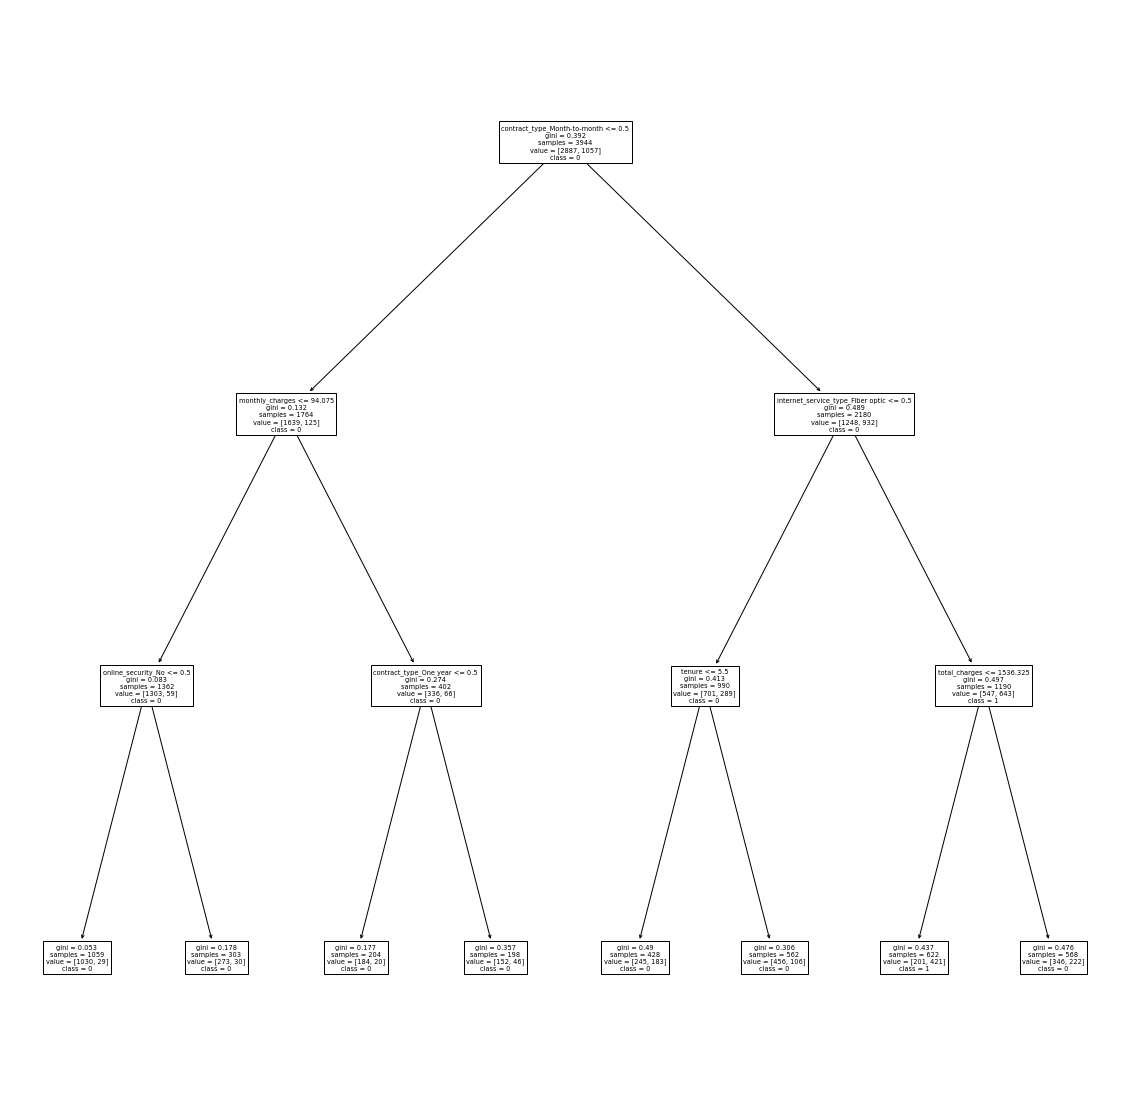

In [57]:
# Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [63]:
print('Accuracy of tree_1:',tree_1.score(X_train, y_train))

Accuracy of tree_1: 0.7877789046653144


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


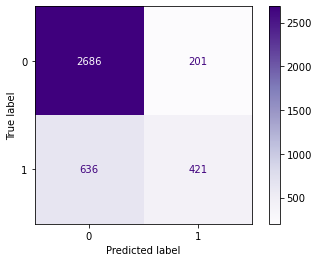

In [59]:
plot_confusion_matrix(tree_1, X_train, y_train, cmap='Purples')

In [60]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2887
           1       0.68      0.40      0.50      1057

    accuracy                           0.79      3944
   macro avg       0.74      0.66      0.68      3944
weighted avg       0.77      0.79      0.77      3944



In [61]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of max_depth = 3,min_samples_split = 5")
pd.DataFrame(report)

Tree of max_depth = 3,min_samples_split = 5


,0,1,accuracy,macro avg,weighted avg
precision,0.808549,0.676849,0.787779,0.742699,0.773253
recall,0.930378,0.398297,0.787779,0.664337,0.787779
f1-score,0.865196,0.501489,0.787779,0.683342,0.767722
support,2887.000000,1057.000000,0.787779,3944.000000,3944.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Create a confusion matrix

* True Positive: number of occurrences where y is true and y is predicted true.
* True Negative: number of occurrences where y is false and y is predicted false.
* False Positive: number of occurrences where y is false and y is predicted true.
* False Negative: number of occurrences where y is true and y is predicted false.

In [74]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative:  {FN}')
print(f'True Positive: {TP}')


True Negative: 2686
False Positive: 201
False Negative:  636
True Positive: 421


In [73]:
 confusion_matrix(y_train, y_predictions)

array([[2686,  201],
       [ 636,  421]])

In [77]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 2887
Positive Cases: 1057
0    2887
1    1057
Name: churn_Yes, dtype: int64


### churn_Yes (1) is the positive case

In [84]:
# look at classification report of tree_1 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       170
           1       0.81      0.69      0.75        98

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



In [85]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL

true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)

true_negative_rate = specificity = selectivity = TN/(TN+FP)

false_negative_rate = miss_rate = FN/(FN+TP)

precision = PPV = TP/(TP+FP)

f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN

support_neg = FP + TN



In [86]:
print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7877789046653144 

True Positive Rate/Sensitivity/Recall/Power: 0.39829706717123936 

False Positive Rate/False Alarm Ratio/Fall-out: 0.06962244544509871 

True Negative Rate/Specificity/Selectivity: 0.9303775545549012 

False Negative Rate/Miss Rate: 0.6017029328287606 

Precision/PPV: 0.6768488745980707 

F1 Score: 0.5014889815366289 

Support (0): 2887 

Support (1): 1057


### 5. Run through steps 2-4 using a different max_depth value.

In [89]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split = 5, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.731998     0.0  0.731998     0.365999      0.535821
recall        1.000000     0.0  0.731998     0.500000      0.731998
f1-score      0.845264     0.0  0.731998     0.422632      0.618732
support    2887.000000  1057.0  0.731998  3944.000000   3944.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.849673     0.540336  0.756339     0.695005      0.766770
recall        0.810530     0.608325  0.756339     0.709428      0.756339
f1-score      0.829640     0.572319  0.756339     0.700979      0.760677
support    2887.000000  1057.000000  0.756339  3944.000000   3944.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.808549     0.676849  0.787779     0.742699      0.773253
recall        0.930378     0.398297  0.787779     0.664337      0.787779

In [90]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.731998,0.751521,-0.019523
1,2,0.756339,0.775862,-0.019523
2,3,0.787779,0.805274,-0.017495
3,4,0.793103,0.798174,-0.005071
4,5,0.795639,0.803245,-0.007606
5,6,0.810091,0.799189,0.010903
6,7,0.825051,0.783976,0.041075
7,8,0.840771,0.772819,0.067951
8,9,0.862576,0.768763,0.093813
9,10,0.884381,0.756592,0.127789


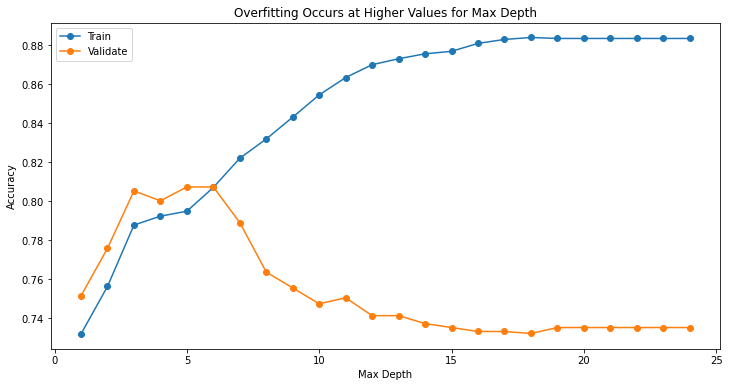

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')


#plt.plot(df_2.max_depth, df_2.validate_accuracy, marker = 'x', label = 'Validate')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_leaf= 11, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_2 = pd.DataFrame(metrics)
df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.731998,0.751521,-0.019523
1,2,0.756339,0.775862,-0.019523
2,3,0.787779,0.805274,-0.017495
3,4,0.792343,0.800203,-0.007860
4,5,0.794371,0.806288,-0.011917
5,6,0.805781,0.811359,-0.005578
6,7,0.817191,0.787018,0.030172
7,8,0.822262,0.793103,0.029158
8,9,0.831643,0.773834,0.057809
9,10,0.837221,0.770791,0.066430
